In [88]:
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [89]:

df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv")
df.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

# Analisis del problema
Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

Para ello, se ha establecido que nuestro recurso sanitario a estudiar es el total de hospitales por condado = Total Hospitals (2019)

In [90]:
# Mostrar todas las filas
pd.set_option("display.max_rows", 5)

# Mostrar todas las columnas
pd.set_option("display.max_columns", None)

# Ajustar el ancho de cada columna si es necesario
pd.set_option("display.max_colwidth", None)

# Aumentar el ancho total del display
pd.set_option("display.width", 0)


## VARIABLES QUE SON RECURSOS SANITARIOS
# 1. Recursos Humanos Sanitarios
Médicos:

Active Physicians per 100000 Population 2018 (AAMC)

Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)

Active Primary Care Physicians per 100000 Population 2018 (AAMC)

Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)

Active General Surgeons per 100000 Population 2018 (AAMC)

Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)

Otros profesionales sanitarios

Total nurse practitioners (2019)

Total physician assistants (2019)

## 2.Infraestructura Sanitaria

Total Hospitals (2019) "mi variable de estudio"
(Cantidad total de hospitales en el condado)

ICU Beds_x
(Número de camas de UCI)

## 3. Especialidades médicas (producción asistencial)

Estas variables también son indicadores de recursos sanitarios porque reflejan capacidad asistencial:

Internal Medicine Primary Care (2019)

Family Medicine/General Practice Primary Care (2019)

Total Specialist Physicians (2019)

antes de comenzar a hacer el analisis de los datos, haremos una limpieza de los datos redundantes que no nos aportan nada o que en teoria tienen el mismo significado que otra variable, trabajaremos con las medidas de los datos en porcentajes, esto nos aporta un valor con mas significado para muchas variables no teniendo que determinar el numero de poblacion sino el porcentaje que cada variable tiene sobre la misma. para nuestra variable de salida he decidido hacer el estudio de Total Hospitals (2019) por lo  cual será mi target de respuesta "Y", para el proyecto se me pide dar repuesta a una variable dependiente de recursos sanitarios por  variables independientes de datos demograficos por lo que tambien eliminare de nuestro dataset las columnas que representan recursos sanitarios.

# limpieza de columnas 

In [91]:
#eliminacion de identificadores
df.drop(['fips', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS'], axis=1, inplace=True)

In [92]:

#Población absoluta (mantendremos solo porcentajes)
df.drop(['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+','Total Population', 'POP_ESTIMATE_2018', 'Population Aged 60+'], axis=1, inplace=True)


In [93]:

#Raza absoluta (mantendremos % racial)
df.drop(["White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop", "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop", "Two or more races pop"], axis=1, inplace=True)

In [94]:

#Educación absoluta (solo usaremos porcentajes)
df.drop(['Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18"], axis=1, inplace=True)


In [95]:

#Pobreza (mantendremos solo porcentajes)
df.drop(['POVALL_2018'], axis=1, inplace=True)


In [96]:

# Enfermedades: eliminar valores absolutos (mantener prevalencias)
df.drop(['anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number'], axis=1, inplace=True)


In [97]:

#Ingresos: eliminar duplicados y CI
df.drop(['CI90LBINC_2018', 'CI90UBINC_2018', 'Med_HH_Income_Percent_of_State_Total_2018'], axis=1, inplace=True)


In [98]:

#Migraciones y cálculo derivado
df.drop(['R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'R_NATURAL_INC_2018', 'N_POP_CHG_2018'], axis=1, inplace=True)


In [99]:

#otros datos no necesarios
df.drop(['Median_Household_Income_2018','GQ_ESTIMATES_2018'], axis=1, inplace=True)


In [100]:

#Recursos Medicos
df.drop(["Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)", "Active Physicians per 100000 Population 2018 (AAMC)",
        "Active Primary Care Physicians per 100000 Population 2018 (AAMC)", "Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)",
        "Active General Surgeons per 100000 Population 2018 (AAMC)","Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)", 
        "Total nurse practitioners (2019)", "Total physician assistants (2019)","Internal Medicine Primary Care (2019)", "Family Medicine/General Practice Primary Care (2019)", "Total Specialist Physicians (2019)"], axis=1 , inplace=True)


In [101]:

#Infraestructura Sanitaria
df.drop(["ICU Beds_x"], axis=1, inplace=True)


In [102]:
df.columns

Index(['0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '20-29 y/o % of total pop', '30-39 y/o % of total pop',
       '40-49 y/o % of total pop', '50-59 y/o % of total pop',
       '60-69 y/o % of total pop', '70-79 y/o % of total pop',
       '80+ y/o % of total pop', '% White-alone', '% Black-alone',
       '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone',
       '% Two or more races', 'R_birth_2018', 'R_death_2018',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Total Hospitals (2019)',
       'Percent of Population Aged 60+', 'county_pop20

Para modelos de regresión NO se deben incluir los intervalos de confianza (CI)

porque:

Son derivados del valor principal → colinealidad automática

No aportan información independiente sobre la población

Introducen ruido y multiplican el VIF

Dañan la estabilidad del modelo

💡 Lo correcto es quedarse solo con la prevalencia

In [103]:
df.drop(["anycondition_Lower 95% CI", "anycondition_Upper 95% CI","Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Heart disease_Lower 95% CI",
         "Heart disease_Upper 95% CI","COPD_Lower 95% CI","COPD_Upper 95% CI", "diabetes_Lower 95% CI","diabetes_Upper 95% CI","CKD_Lower 95% CI",
         "CKD_Upper 95% CI"],axis=1, inplace=True)

In [104]:
#he dejado la variable anycondition_prevalence ya que me resume el porcentaje de personas que tiene al menos una enfermedad cronica, si 
#quisiera incluir las enfermedades por separado entonces dejaria estas columnas t  eliminaria la columna de "anycondition_prevalence "
df.drop(["Obesity_prevalence", "Heart disease_prevalence", "COPD_prevalence", "diabetes_prevalence", "CKD_prevalence"],axis=1, inplace=True)

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.951840,25.460677
10-19 y/o % of total pop,3140.0,12.694609,1.815044,0.0,11.674504,12.687422,13.659282,23.304372
...,...,...,...,...,...,...,...,...
anycondition_prevalence,3140.0,46.793917,6.379448,22.0,42.900000,47.200000,51.000000,66.200000
Urban_rural_code,3140.0,4.635350,1.510447,1.0,3.000000,5.000000,6.000000,6.000000


# Analisis de correlaciones

Al haber eliminado tantan variables del dataframe se puede obsservar si existe alguna variable que este muy correlacionada con el resto y eliminarla y asi evitar el uso de variables que no me aportan al modelo, le he dado a la correlacion un valor absoluto mayor a 0.8 para que muestre solo las realmente muy correlacionadas

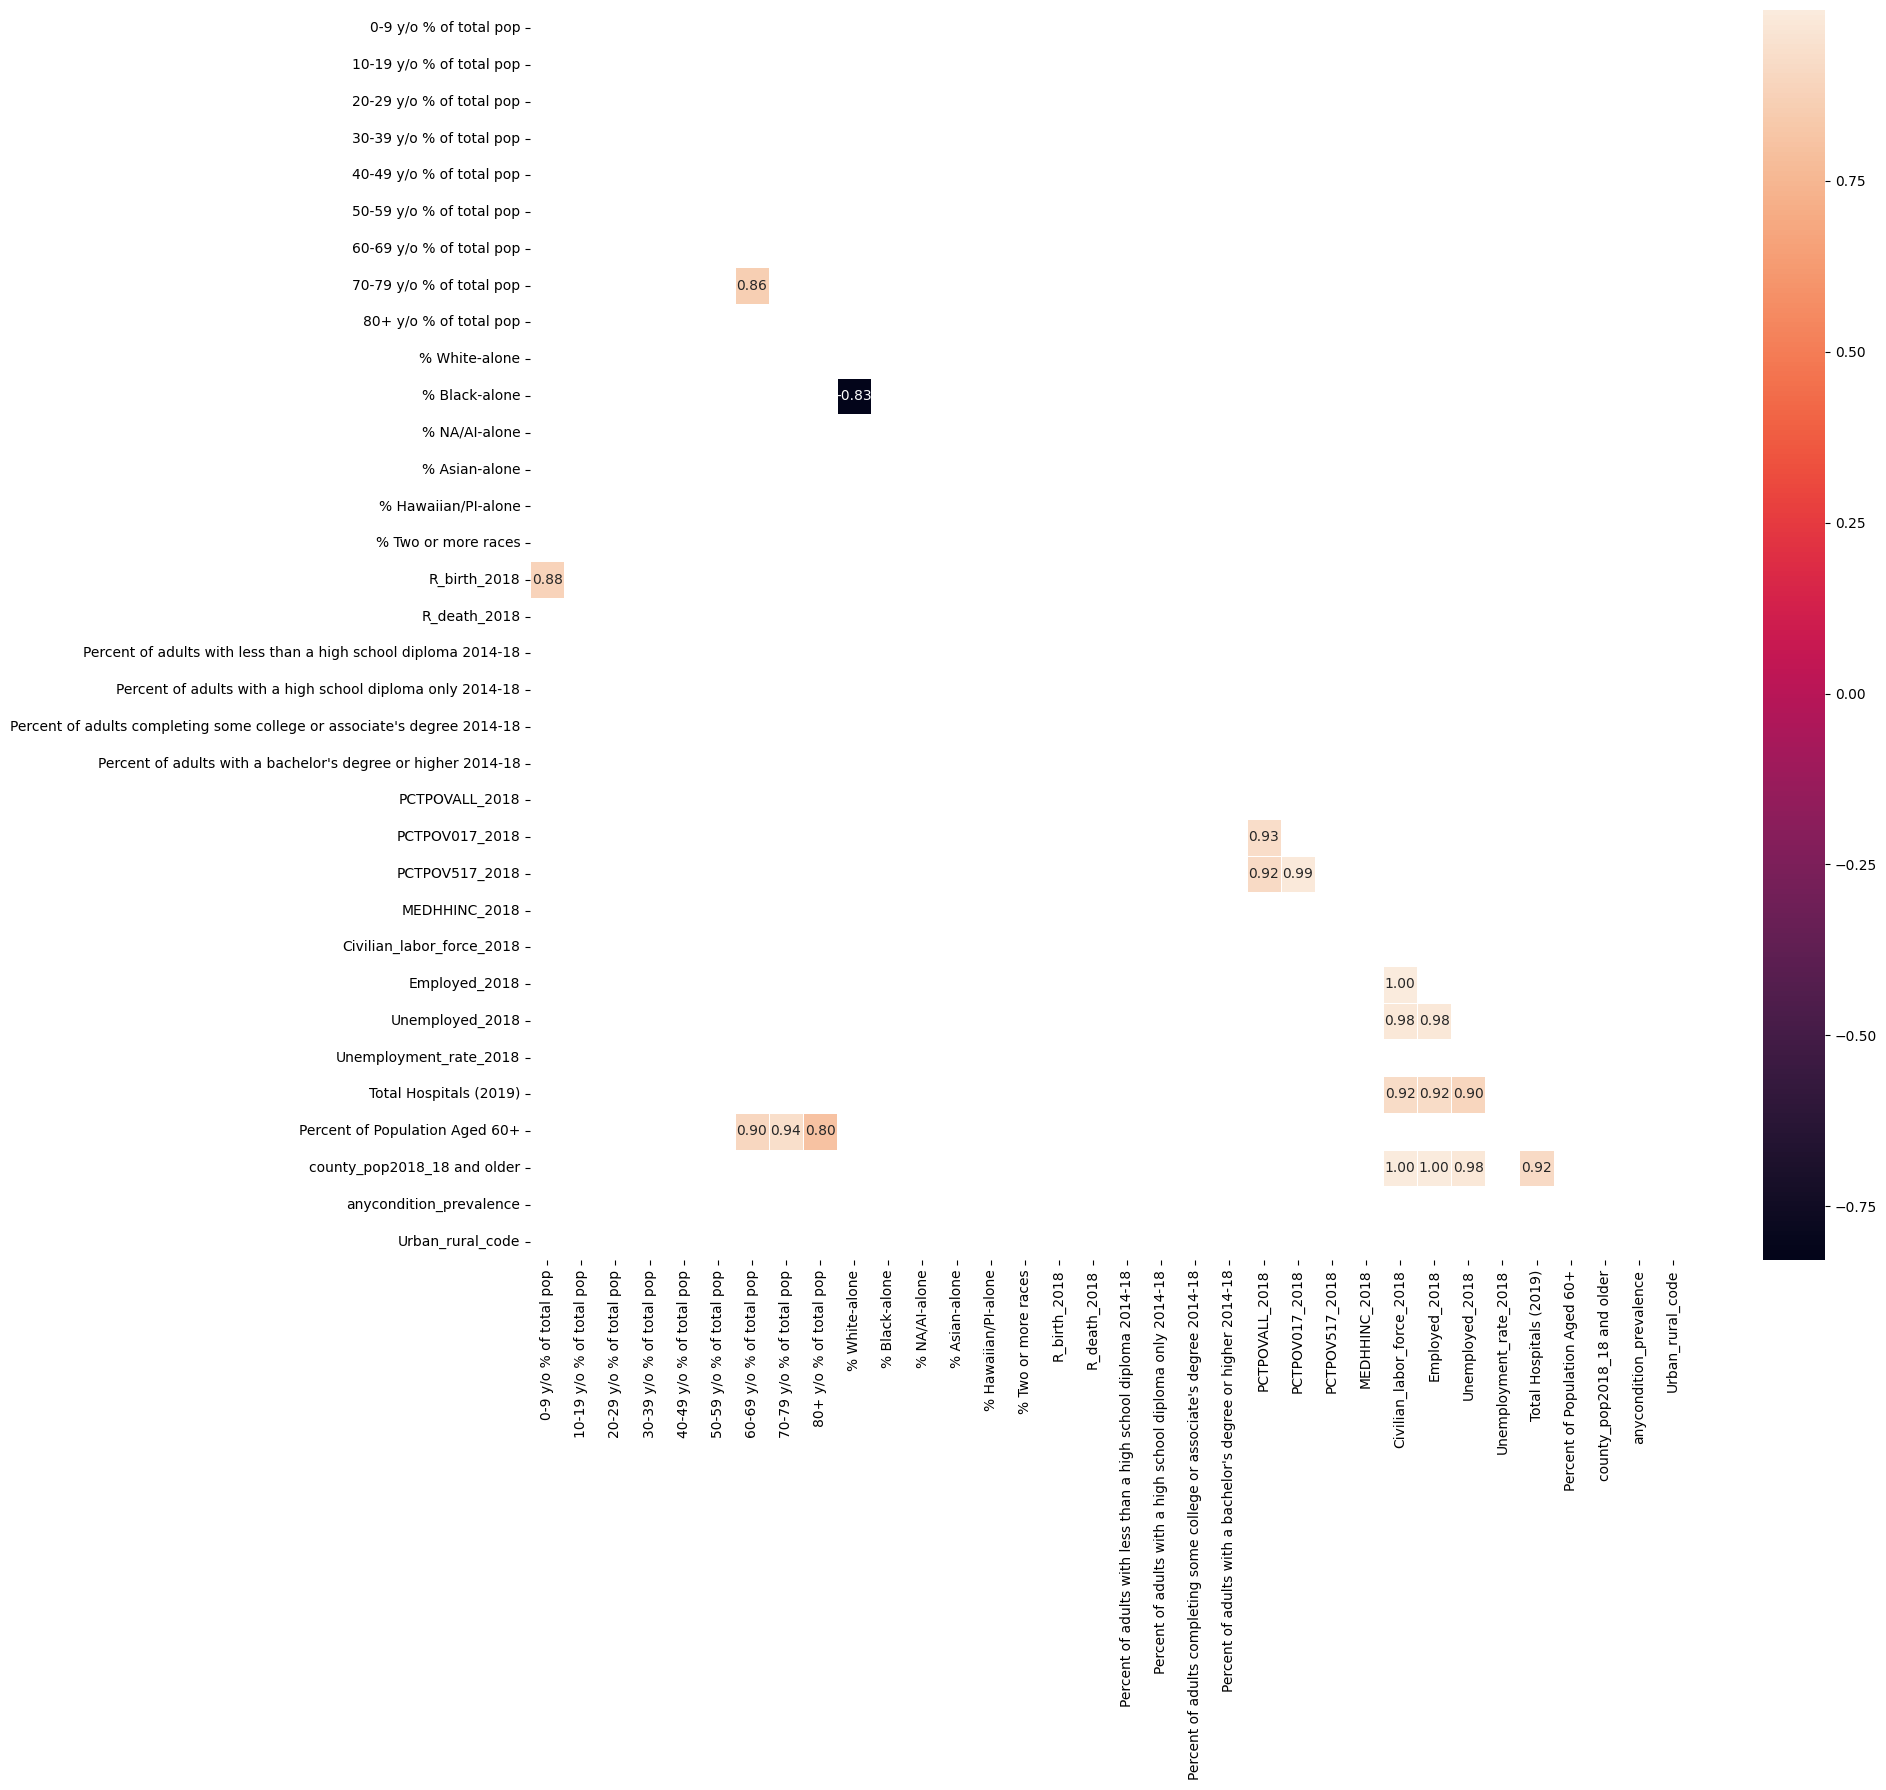

In [106]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.8]
significant_corr
fig, axis = plt.subplots(figsize=(20, 18))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

se puede observar que tenemos muchas variables que estan muy correlacionadas con el resto de las variables independiente por ejemplo los niños nacidos en el  ultimo año con el % de la poblacion menor a 9 años, tenemos una variable que nos indica tambien el % de personas mayores a 60 años tenemos las personas que pueden trabajar relacionas con las que son mayor a 18 años, porcentaje de empleadoss con desempleados ect, estas variables seran eliminadas.

In [107]:
df.drop(["R_birth_2018","60-69 y/o % of total pop",	"70-79 y/o % of total pop",	
         "80+ y/o % of total pop","PCTPOVALL_2018", "PCTPOV017_2018", "PCTPOV517_2018","county_pop2018_18 and older",
         "Civilian_labor_force_2018", "Unemployed_2018" ],axis=1, inplace=True)

# Division del dataset en nuestra variable dependiente y las descriptoras


In [108]:
target = "Total Hospitals (2019)"

# Eliminamos filas donde la variable objetivo esté vacía
df = df.dropna(subset=[target])

X = df.drop(columns=[target])
y = df[target]



# Splite

In [109]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)
X_train.shape, X_test.shape

((2512, 23), (628, 23))

# Normalizacion

In [110]:

#al ser todas las variables numericas se pasa directamente a la normalización 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Entrenamiento del modelo

In [111]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Predicción del modelo

In [112]:
y_pred = model.predict(X_test_scaled)

# evaluacion del modelo

In [113]:

R2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

R2, RMSE


(0.8729795142078156, np.float64(1.5175682789144356))

 Modelo generado

In [114]:
coef_importance = pd.DataFrame({
    'variable': X.columns,
    'coeficiente': model.coef_
}).sort_values(by='coeficiente', ascending=False)
ecuacion=""
for i, row in coef_importance.iterrows():
    coef = row['coeficiente']
    var = row['variable']
    
    # Formato matemático
    ecuacion += f"{coef:.4f} * {var} + "

# Quitar el último "+"
ecuacion = ecuacion.rstrip(" + ")
ecuacion




"3.8710 * Employed_2018 + 1.4220 * Percent of adults with a bachelor's degree or higher 2014-18 + 0.5938 * Percent of adults with a high school diploma only 2014-18 + 0.4680 * Percent of adults completing some college or associate's degree 2014-18 + 0.3208 * anycondition_prevalence + 0.2811 * Percent of adults with less than a high school diploma 2014-18 + 0.2482 * 30-39 y/o % of total pop + 0.2439 * 0-9 y/o % of total pop + 0.0109 * 10-19 y/o % of total pop + 0.0101 * 40-49 y/o % of total pop + -0.0139 * Unemployment_rate_2018 + -0.0254 * 50-59 y/o % of total pop + -0.0640 * R_death_2018 + -0.1113 * 20-29 y/o % of total pop + -0.1451 * Percent of Population Aged 60+ + -0.2806 * Urban_rural_code + -0.5732 * MEDHHINC_2018 + -3298739.9700 * % Hawaiian/PI-alone + -12614208.1403 * % Two or more races + -25800963.6345 * % Asian-alone + -65739450.8963 * % NA/AI-alone + -125624901.8995 * % Black-alone + -140862169.5176 * % White-alone"

In [115]:
coef_importance

,variable,coeficiente
18,Employed_2018,3.871000e+00
16,Percent of adults with a bachelor's degree or higher 2014-18,1.422050e+00
...,...,...
7,% Black-alone,-1.256249e+08
6,% White-alone,-1.408622e+08


# lasso model

se usara en este caso ya que tenemos muchas variables y pocas con correlacion fuerte con nuestro target

In [116]:
lasso_model = Lasso(alpha = 0.1, max_iter = 300)

lasso_model.fit(X_train_scaled, y_train)

y_pred1 = lasso_model.predict(X_test_scaled)

In [117]:
f"Error cuadrático medio: {mean_squared_error(y_test, y_pred1)}"

'Error cuadrático medio: 2.0295650114572457'

In [118]:
f"Coeficiente de determinación: {r2_score(y_test, y_pred1)}"

'Coeficiente de determinación: 0.8880613006349181'

<h3>Observaciones</h3>
Se puede observar que tenemos un coeficiente de 0.89 lo  que indica un 89% de aciertos con solo 1.97 de error cuadratico

# rigde_model

In [119]:
ridge_model = Ridge(alpha = 0.1, max_iter = 300)

ridge_model.fit(X_train_scaled, y_train)

y_pred2 = ridge_model.predict(X_test)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [120]:
f"Error cuadrático medio: {mean_squared_error(y_test, y_pred2)}"

'Error cuadrático medio: 336543083259.5798'

In [121]:
f"Coeficiente de determinación: {r2_score(y_test, y_pred1)}"

'Coeficiente de determinación: 0.8880613006349181'

se puede observar que aunque nos ha dado unn coeficiente de determinacion alto tenemos un error cuadratico  muy elevado, diferente al caso visto al usar lasso en donde tenemos un error cuadratico medio de 2.02